# LQR: Dynamic Programming

Consider a standard finite-horizon LQR problem:
$$
\begin{aligned}
    \min_{x_{0:N},\,u_{0:N-1}} &\sum_{k=0}^{N-1} \Bigg(\frac{1}{2}x_k^\top Q x_k + \frac{1}{2}u_k^\top R u_k \Bigg) + \frac{1}{2}x_N^T P x_N \\
    \textrm{s.t.} \quad &x_{k+1} = A x_k + B u_k,\; i = 0, \cdots, N-1.
\end{aligned}
$$

- Value function (cost-to-go): $\; V(x) = \frac{1}{2} x^\top \Pi x$

- Bellman equation:
$$
\begin{aligned}
    V(x_k) &= \min_{u_k} \quad \ell(x_k, u_k) + V(x_{k+1}) \\
    &= \min_{u_k} \quad \frac{1}{2}x_k^\top Q x_k + \frac{1}{2}u_k^\top R u_k + \frac{1}{2}(A x_k + B u_k)^\top \Pi_{k+1} (A x_k + B u_k)  \\
    &= \min_{u_k} \quad \frac{1}{2}u_k^\top (R + B^\top \Pi_{k+1} B) u_k + x_k^\top(A^\top \Pi_{k+1} B)u_k + \textcolor{blue}{\text{constant}} \\
    &= \min_{u_k} \quad Q(x_k, u_k)
\end{aligned}
$$

- Optimal control input $u_k^*$:
$$
\frac{\partial Q}{\partial u_k} = (R + B^\top \Pi_{k+1} B) u_k^* + B^\top \Pi_{k+1} A x_k = 0
$$
$$
\begin{aligned}
    u_k^* &= - (R + B^\top \Pi_{k+1} B)^{-1} B^\top \Pi_{k+1} A x_k \\
    & = K_k x_k
\end{aligned}
$$
P.S. *It is usually inefficient to directly compute the inverse of a matrix. Please use linear solvers or appropriate matrix factorizations. https://nl.mathworks.com/help/matlab/ref/double.mldivide.html*

- Value function at stage $k$:`
$$
\begin{aligned}
    V(x_k) &= \frac{1}{2}x_k^\top Q x_k + \frac{1}{2}\red{u_k^{*}}^\top R \red{u_k^{*}} + \frac{1}{2}(A x_k + B \red{u_k^{*}})^\top \Pi_{k+1} (A x_k + B \red{u_k^{*}}) \\
    &= \frac{1}{2}x_k^\top \left(  \underbrace{Q + K_k^\top R K_k + (A + BK_k)^\top \Pi_{k+1} (A + BK_k)}_{\Pi_k}  \right) x_k \\
    &= \frac{1}{2}x_k^\top \Pi_k x_k
\end{aligned}
$$
In the end, we obtain
$$
\Pi_k = Q + K_k^\top R K_k + (A + BK_k)^\top \Pi_{k+1} (A + BK_k).
$$
This is called the **Discrete Time Riccati equation**. At times, you may encounter an alternative form of $\Pi_{k}$. Let us derive it now.
$$
\begin{aligned}
\Pi_k &= Q + K_k^\top R K_k + (A + BK_k)^\top \Pi_{k+1} (A + BK_k) \\
&= Q + \red{K_k^\top R K_k} + A^\top \Pi_{k+1} A + \red{K_k^\top B^\top \Pi_{k+1} B K_k} + 2 A^\top \Pi B K_k \\
&= Q + A^\top \Pi_{k+1} A + 2 A^\top \Pi_{k+1} B K_k + \red{K_k^\top (R + B^\top \Pi_{k+1} B) K_k} \\
& = Q + A^\top \Pi_{k+1} A + 2 A^\top \Pi_{k+1} B K_k - K_k^\top (R + B^\top \Pi_{k+1} B) \underbrace{(R + B^\top \Pi_{k+1} B)^{-1} B^\top \Pi_{k+1} A}_{K_k} \\
&= Q + A^\top \Pi_{k+1} A + A^\top \Pi_{k+1} B K_k .
\end{aligned}
$$

# LQR: KKT conditions

We can view a LQR problem as a quadratic program with equality constraints. The corresponding Lagrangian is expresed as:

$$
\mathcal{L} (\bar{x}, \bar{u}, \bar{\lambda}) = \sum_{k=0}^{N-1} \Bigg(\frac{1}{2}x_k^\top Q x_k + \frac{1}{2}u_k^\top R u_k + \lambda_{k+1}^\top \left(A x_k + B u_k - x_{k+1} \right) \Bigg) + \frac{1}{2}x_N^T P x_N
$$

where $\bar{\lambda} = (\lambda_1, \cdots, \lambda_N)$ is a vector of Lagrange multipliers. The KKT conditions are derived as:
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \bar{x}} = 0,\;
\frac{\partial \mathcal{L}}{\partial \bar{u}} = 0,\;
\frac{\partial \mathcal{L}}{\partial \bar{\lambda}} = 0,
\end{aligned}
$$

$$
\begin{equation*}
    \left[
    \begin{array}{ccccccccc}
        R & B^\top \\
        B & & -I\\
        \hline
        & -I & Q & 0 & A^\top \\
        & &  0 & R & B^\top  \\
        & & A & B & & -I \\
        \hline
        & & & & -I & Q & 0 & A^\top \\
        & & & & & 0 & R & B^\top \\
        & & & & & A & B & & -I \\
        \hline
        & & & & & & & -I & P 
    \end{array}
    \right]
    \left[
    \begin{array}{c}
        u_0 \\
        \lambda_1 \\
        \hline
        x_1 \\
        u_1 \\
        \lambda_2 \\
        \hline
        x_2 \\
        u_2 \\
        \lambda_3 \\
        \hline
         x_3
    \end{array}
    \right] = 
    \left[
    \begin{array}{c}
        0 \\
        -A x_0 \\
        \hline
        0 \\  
        0 \\
        0 \\
        \hline
        0 \\  
        0 \\
        0 \\
        \hline
        0
    \end{array}
    \right]
\end{equation*}.
$$

Let us solve this banded linear system. 

The last row:
$$
\lambda_3 = P x_3 := \red{\Pi_3} x_3
$$

The 3rd last row:
$$
\begin{aligned}
R u_2 + B^\top \lambda_3 &= 0 \\
R u_2 + B^\top (P x_3) &= 0 \\
R u_2 + B^\top P (A x_2 + B u_2) &= 0 \\
(R + B^\top P B) u_2 &= - B^\top P A x_2 \\
u_2 &= \underbrace{- (R + B^\top P B)^{-1} B^\top P A}_{K_2} x_2
\end{aligned}
$$

The 4th last row:
$$
\begin{aligned}
-\lambda_2 + Q x_2 + A^\top \lambda_3 &= 0 \\
-\lambda_2 + Q x_2 + A^\top P x_3 &= 0 \\ 
-\lambda_2 + Q x_2 + A^\top P (A x_2 + B u_2) &= 0 \\ 
-\lambda_2 + Q x_2 + A^\top P (A x_2 + B K_2 x_2) &= 0 \\
\lambda_2 &= \left( Q + A^\top P (A + B K_2) \right) x_2 := \red{\Pi_2} x_2
\end{aligned}
$$
Then, we can repeat the same procedure until the initial stage. This derivation process is closely connected to dynamic programming, and the relationship between the Lagrange multiplier and the value function is given by: 
$$
\lambda_k = \Pi_k x_k = \frac{\partial V}{\partial x_k}
$$

# Stability of Finite-Horizon Optimal Control Laws

Consider a linear system with 
$$
A = \begin{bmatrix}
\frac{4}{3} & -\frac{2}{3} \\
1 & 0
\end{bmatrix},\; 
B = \begin{bmatrix}
1 \\ 0 
\end{bmatrix},\;
C = \begin{bmatrix}
-\frac{2}{3} & 1
\end{bmatrix}.
$$

We choose $Q = C^\top C$ so that the output $y$ is penalized. To eansure that $Q$ is positive definite, we add a small regularization term. Some parameters of the LQR controller are listed as follows:
$$
Q = C^\top C + 0.001 I = \begin{bmatrix}
\frac{4}{9} + 0.001 & -\frac{2}{3} \\
-\frac{2}{3} & 1.001
\end{bmatrix},\;
R = 0.001,\;

N = 5.
$$

We now iterate the Riccati equation to compute the optimal feedback gain.

In [26]:
import numpy as np
from scipy.linalg import cho_factor, cho_solve

def lqr_backward(Q, R, Qf, N):
    """
    Backward pass of the LQR
    """
    nx = Q.shape[0]
    nu = R.shape[0]

    Ps = np.zeros((N + 1, nx, nx))
    Ks = np.zeros((N, nu, nx))
    
    Ps[-1, :, :] = Qf
    for i in range(N - 1, -1, -1):
        P_next = Ps[i + 1, :, :]        
        chofac = cho_factor(R + B.T @ P_next @ B)      
        K_k = - cho_solve(chofac, B.T @ P_next @ A)    
        
        # Two equivalent ways to compute P_k    
        # P_k = Q + K_k.T @ R @ K_k + (A + B @ K_k).T @ P_next @ (A + B @ K_k)
        P_k = Q + A.T @ P_next @ A + A.T @ P_next @ B @ K_k
        
        Ks[i, :, :] = K_k
        Ps[i, :, :] = P_k
                
    return Ks, Ps

def lqr_forward(A, B, Ks, x0):
    """
    Forward pass of the LQR
    """
    N = Ks.shape[0]
    nx = A.shape[0]
    nu = B.shape[1]
    
    x_bar = np.zeros((N + 1, nx))
    u_bar = np.zeros((N, nu))
    
    x_bar[0, :] = x0
    for k in range(N):
        u_bar[k, :] = Ks[k, :, :] @ x_bar[k, :]
        x_bar[k + 1, :] = A @ x_bar[k, :] + B @ u_bar[k, :]
    
    return x_bar, u_bar    

In [27]:
A = np.array([
    [4 / 3, -2 / 3], 
    [1, 0]
])
B = np.array([1, 0]).reshape(-1, 1)  # TODO
R = np.array([0.001]).reshape(-1, 1)  # TODO
Q = np.array([
    [4 / 9 + 0.001, -2 / 3],
    [-2 / 3, 1 + 0.001]
])
P = Q.copy()

N = 5
Ks, Ps = lqr_backward(Q, R, P, N)

A_cl = A + B @ Ks[0] # closed-loop system matrix
eigvals, _ = np.linalg.eig(A_cl)

np.set_printoptions(precision=3, suppress=True)
print(f"eigen values: {eigvals}")

eigen values: [1.307 0.001]


We now increase the prediction horizon.

In [28]:
N = 7
Ks, Ps = lqr_backward(Q, R, P, N)

A_cl = A + B @ Ks[0] # closed-loop system matrix
eigvals, _ = np.linalg.eig(A_cl)

np.set_printoptions(precision=3, suppress=True)
print(f"eigen values: {eigvals}")

eigen values: [0.989 0.001]


The controller is stabilizing the system. If we keep iterating the Riccati equation, the optimal feedback gain converges.

In [29]:
from control import dare
N = 25
Ks, Ps = lqr_backward(Q, R, P, N)
print(f"K_25: {Ks[0]}")

_, _, K_inf = dare(A, B, Q, R)
K_inf = -K_inf
print(f"K_inf: {K_inf}")

K_25: [[-0.668  0.666]]
K_inf: [[-0.668  0.666]]


We now investigate the closed-loop simulation.

In [30]:
def simulate(A, B, Q, R, Qf, N, N_sim, x0):
    """
    Simulate the system with the finite-horizon LQR controller
    """
    nx = A.shape[0]
    nu = B.shape[1]
    
    x_bar_cl = np.zeros((N_sim + 1, nx))
    u_bar_cl = np.zeros((N_sim, nu))
    x_bars_pred = np.zeros((N_sim + 1, N + 1, nx))
    u_bars_pred = np.zeros((N_sim, N, nu)) 
    
    x_bar_cl[0, :] = x0
    Ks, _ = lqr_backward(Q, R, Qf, N)
    for i in range(N_sim):
        x_bars_pred[i, :, :], u_bars_pred[i, :, :] = lqr_forward(A, B, Ks, x_bar_cl[i, :])
        u_bar_cl[i, :] = u_bars_pred[i, 0, :]
        x_bar_cl[i + 1, :] = A @ x_bar_cl[i, :] + B @ u_bar_cl[i, :]
    
    return x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred

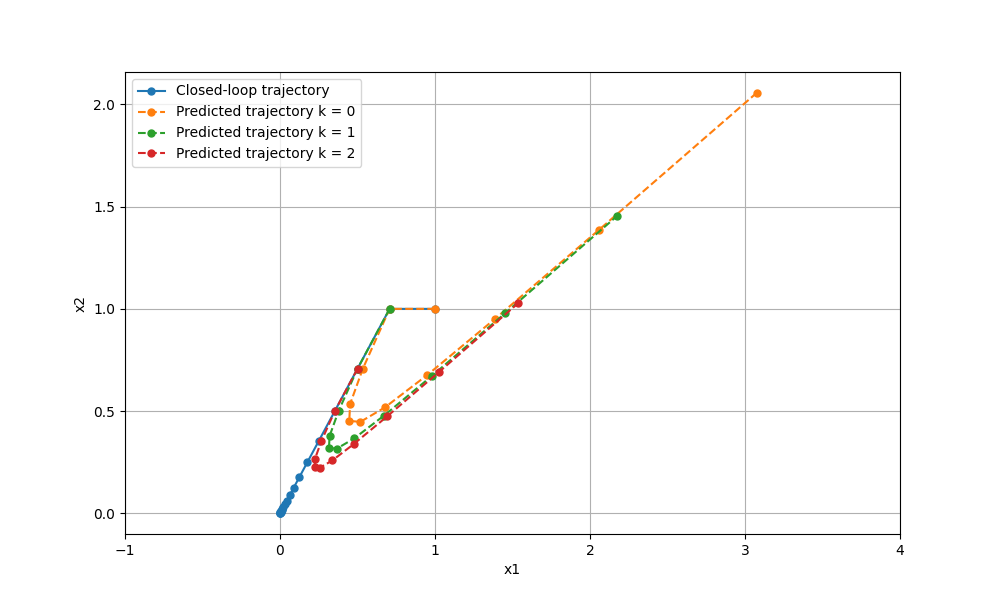

In [31]:
%matplotlib ipympl
import matplotlib.pyplot as plt

# Horizon length
N = 10

N_sim = 20
x0 = np.array([1, 1])
x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred = simulate(A, B, Q, R, Q, N, N_sim, x0)

plt.figure(figsize=(10, 6))
plt.plot(x_bar_cl[:, 0], x_bar_cl[:, 1], '-o', label='Closed-loop trajectory', markersize=5)
plt.plot(x_bars_pred[0, :, 0], x_bars_pred[0, :, 1], '--o', label='Predicted trajectory k = 0', markersize=5)
plt.plot(x_bars_pred[1, :, 0], x_bars_pred[1, :, 1], '--o', label='Predicted trajectory k = 1', markersize=5)
plt.plot(x_bars_pred[2, :, 0], x_bars_pred[2, :, 1], '--o', label='Predicted trajectory k = 2', markersize=5)

plt.xlim([-1, 4])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

**Short horizon:** Predicted and closed-loop trajectories differ.

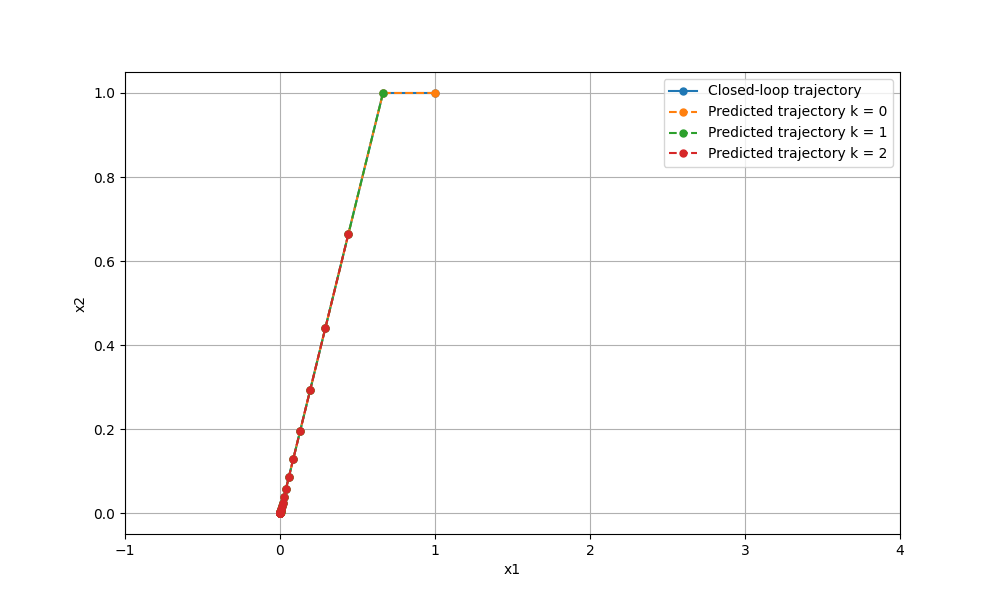

In [32]:
# Horizon length
N = 25

N_sim = 20
x0 = np.array([1, 1])
x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred = simulate(A, B, Q, R, Q, N, N_sim, x0)

plt.figure(figsize=(10, 6))
plt.plot(x_bar_cl[:, 0], x_bar_cl[:, 1], '-o', label='Closed-loop trajectory', markersize=5)
plt.plot(x_bars_pred[0, :, 0], x_bars_pred[0, :, 1], '--o', label='Predicted trajectory k = 0', markersize=5)
plt.plot(x_bars_pred[1, :, 0], x_bars_pred[1, :, 1], '--o', label='Predicted trajectory k = 1', markersize=5)
plt.plot(x_bars_pred[2, :, 0], x_bars_pred[2, :, 1], '--o', label='Predicted trajectory k = 2', markersize=5)

plt.xlim([-1, 4])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

**Long horizon:** Predicted and closed-loop trajectories match.

**Question:** How can we design a terminal cost to ensure that the predicted and closed-loop trajectories align for a short horizon?

Let us go back to the case of $N = 5$. Can the controller stabilize the system with another choice of cost matrices? We increase the penalty on the input and choose $R = 1$.

In [33]:
# Horizon length
N = 5

N_sim = 20
x0 = np.array([1, 1])

R = np.array([1.]).reshape(-1, 1)
Ks, Ps = lqr_backward(Q, R, P, N)

A_cl = A + B @ Ks[0] # closed-loop system matrix
eigvals, _ = np.linalg.eig(A_cl)

np.set_printoptions(precision=3, suppress=True)
print(f"eigen values: {eigvals}")

eigen values: [0.494+0.235j 0.494-0.235j]


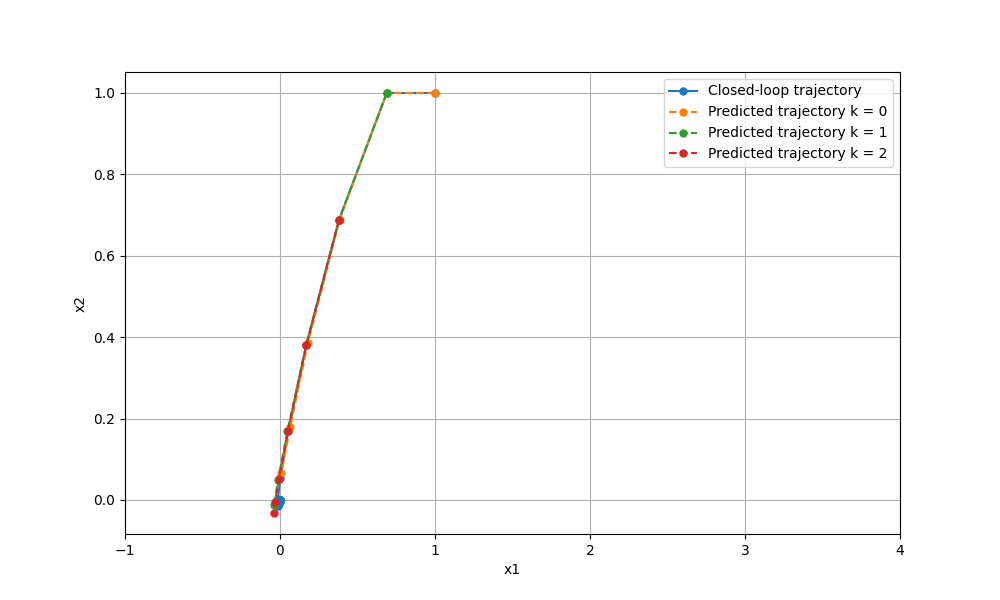

In [34]:
x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred = simulate(A, B, Q, R, Q, N, N_sim, x0)

plt.figure(figsize=(10, 6))
plt.plot(x_bar_cl[:, 0], x_bar_cl[:, 1], '-o', label='Closed-loop trajectory', markersize=5)
plt.plot(x_bars_pred[0, :, 0], x_bars_pred[0, :, 1], '--o', label='Predicted trajectory k = 0', markersize=5)
plt.plot(x_bars_pred[1, :, 0], x_bars_pred[1, :, 1], '--o', label='Predicted trajectory k = 1', markersize=5)
plt.plot(x_bars_pred[2, :, 0], x_bars_pred[2, :, 1], '--o', label='Predicted trajectory k = 2', markersize=5)

plt.xlim([-1, 4])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

## Destabilization with state constraints

We now consider the following LQR parameters:
$$
Q = I,\; R = 1,\; N = 5.
$$

The output constraint $\vert y_k \vert \leq \frac{1}{2}$ is added. Is this controller stabilizing?

In [35]:
import cvxpy as cp
import numpy as np

def solve_mpc(
    A, B, Q, R, P, N, 
    D, c_lb, c_ub,        
    x0,
    with_terminal_constraint=False
):
    dim_x = A.shape[0]
    dim_u = B.shape[1]
    
    x_bar = cp.Variable((N + 1, dim_x))
    u_bar = cp.Variable((N, dim_u))
    
    cost = 0.
    constraints = [x_bar[0, :] == x0]
    for k in range(N):
        cost += 0.5 * cp.quad_form(x_bar[k, :], Q) + 0.5 * cp.quad_form(u_bar[k, :], R)
        constraints += [x_bar[k + 1, :] == A @ x_bar[k, :] + B @ u_bar[k, :]]
        constraints += [D @ x_bar[k + 1, :] <= c_ub]
        constraints += [D @ x_bar[k + 1, :] >= c_lb]
    
    cost += 0.5 * cp.quad_form(x_bar[N, :], P)
    
    if with_terminal_constraint:
        constraints += [x_bar[N, :] == 0]
    
    prob = cp.Problem(cp.Minimize(cost), constraints)
    prob.solve()
    
    assert prob.status == cp.OPTIMAL, "Solver failed to find optimal solution"
    
    return x_bar.value, u_bar.value

In [41]:
dim_x = 2
dim_u = 1
A = np.array([
    [4 / 3, -2 / 3], 
    [1, 0]
])
B = np.array([1, 0]).reshape(-1, 1) 

Q = np.eye(2)
P = Q.copy()
R = np.array([1.]).reshape(-1, 1)

N = 5
D = np.array([-2/3, 1]).reshape(1, 2)
c_lb = -0.5
c_ub =  0.5

x0 = np.array([3, 3])

N_sim = 20
x_hist = np.zeros((N_sim + 1, dim_x))
u_hist = np.zeros((N_sim, dim_u))
x_hist[0, :] = x0

for t in range(N_sim):
    # without terminal constraint
    # x_bar, u_bar = solve_mpc(A, B, Q, R, P, N, D, c_lb, c_ub, x_hist[t, :])
    
    # with terminal constraint
    x_bar, u_bar = solve_mpc(A, B, Q, R, P, N, D, c_lb, c_ub, x_hist[t, :], with_terminal_constraint=True)
    
    x_hist[t + 1, :] = A @ x_hist[t, :] + B @ u_bar[0, :]
    u_hist[t, :] = u_bar[0, :]


AssertionError: Solver failed to find optimal solution

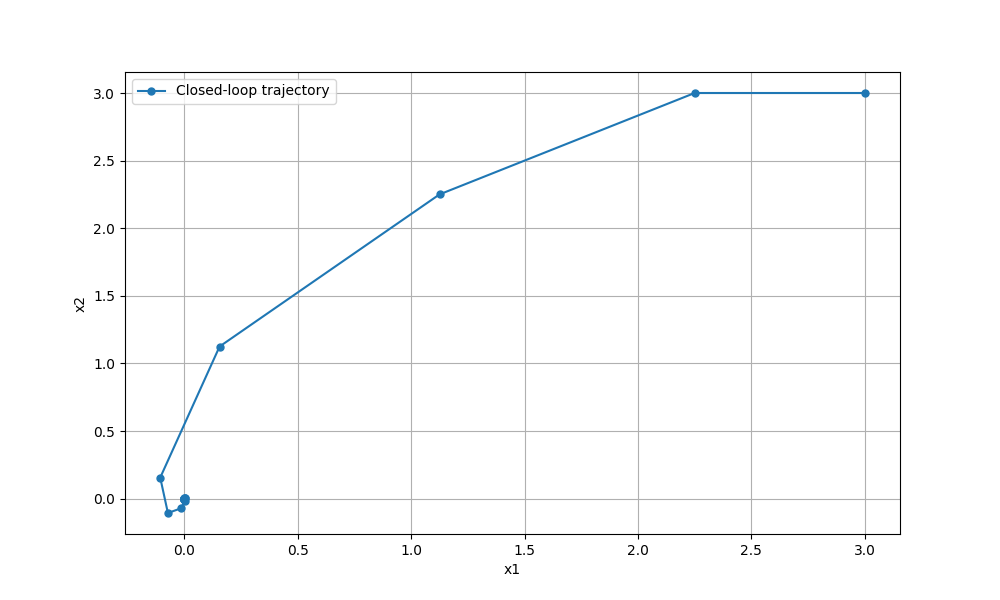

In [39]:
%matplotlib ipympl
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_hist[:, 0], x_hist[:, 1], '-o', label='Closed-loop trajectory', markersize=5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()